# Alignment of datasets

In [1]:
from spectrochempy import *

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display: inline-block; float: left; vertical-align: middle'>",SpectroChemPy's API - v.0.1a13.dev1+g9ab88ea.d20190320© Copyright 2014-2019 - A.Travert & C.Fernandez @ LCS


## Example

To allow some mathematical operations or dataset processing, it is often necessary that the datasets are aligned, *i.e.,* that they have compatible coordinate for the dimensions.

For sake of demonstration, let's take an experimental dataset that we will arbitrary split into four unaligned datasets. Then will realign them and appy some binary mathematical operation such as addition or subtration that required aligned coordinates.

(55, 5549)

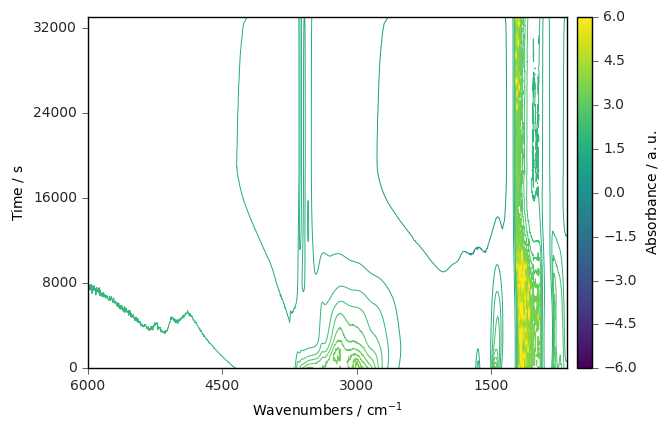

In [2]:
dataset = NDDataset.read_omnic(os.path.join('irdata', 'NH4Y-activation.SPG'))
dataset.y = dataset.y - dataset.y[0]  # remove offset in the time
dataset.y.title = 'Time'
_ = dataset.plot_map(colormap='viridis', colorbar=True)
dataset.shape

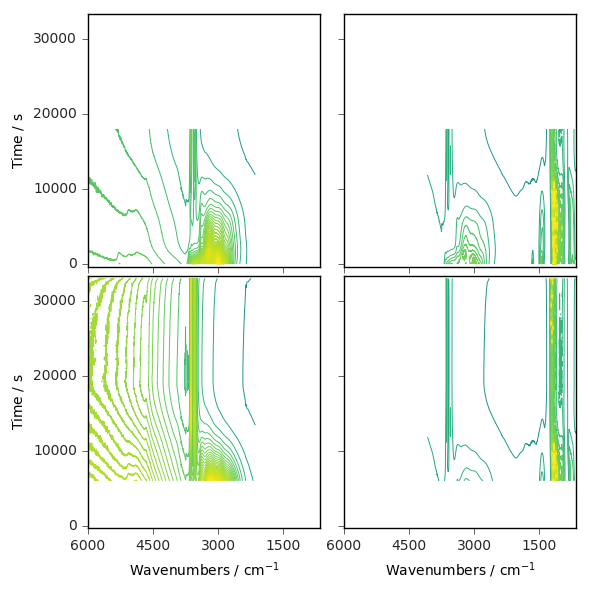

In [3]:
nd1 = dataset[0:30, 0:4000]
nd2 = dataset[0:30, 2000:5549]
nd3 = dataset[10:55, 0:4000]
nd4 = dataset[10:55, 2000:5549]
_ = multiplot_map(datasets=[nd1, nd2, nd3, nd4],  colormap='viridis',
                nrow=2, ncol=2, sharex=True, sharey=True, 
                figsize=(6,6), dpi=100)

The four datasets `nd1` to `nd4` have some overlapping in both dimensions. But it we want for example to add `nd2` with `nd4`. This will fail because the dimension are not aligned. 

In [4]:
try:
    nd2 + nd4
except ArithmeticError:
    error_('Cannot add unaligned datasets')

[SpectroChemPy] ERROR | Cannot add unaligned datasets


Let try to align them, in the `y` dimension (*i.e.* the first) as this the one which differ in size.
(NOTE: to find the actual names of the dimensions, just get the `dims` attribute of the datasets.

In [5]:
nd2.dims, nd4.dims

(['y', 'x'], ['y', 'x'])

To align we can use different methods, depending on the expected results (missing values in the aligned datasets will be masked)

In [6]:
# `outer` method => union of the coordinates
nd2a, nd4a = align(nd2, nd4, dim='y', method='outer')

New we can perform an addition without any problem

In [7]:
ndadd = nd2a + nd4a
ndadd.shape

(55, 3549)

Let's plot both individual aligned arrays, and their sum. Note, that only the common region appears in the result array, as the mathematical operation are aware of the masks.

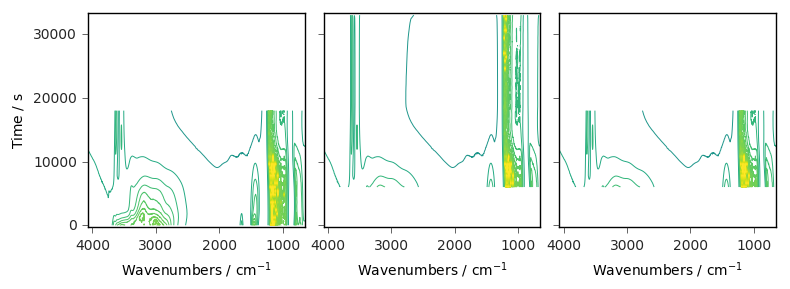

In [8]:
_ = multiplot_map(datasets=[nd2a, nd4a, ndadd],  colormap='viridis', sharey=True,
                nrow=1, ncol=3, figsize=(8, 3), dpi=100)

## Methods for alignments
Method for alignments are:

* **outer** which means that a union of the different coordinates is achieved (missing values are masked)
* **inner** which means that the intersection of the coordinates is used
* **first** which means that the first dataset is used as reference
* **last** which means that the last dataset is used as reference
* **interpolate** means that interpolation is performed to handle missing points whenever it is possible (Not yet implemented)

### `inner` method

In [9]:
# `inner` method => intersection of the coordinates
nd2a, nd4a = align(nd2, nd4, dim='y', method='inner')
ndadd = nd2a + nd4a
ndadd.shape   # note the difference with the outer method above (the shape correspond to the intersection)

(20, 3549)

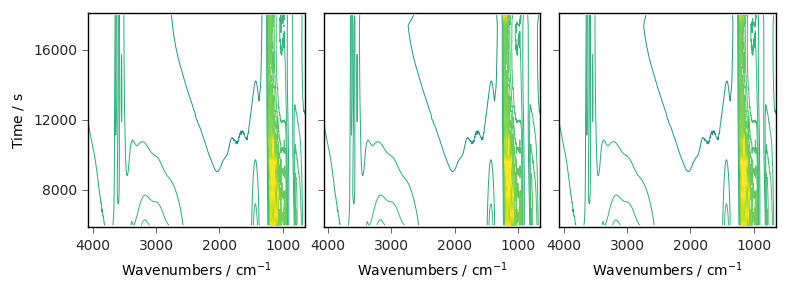

In [10]:
_ = multiplot_map(datasets=[nd2a, nd4a, ndadd],  colormap='viridis', sharey=True,
                nrow=1, ncol=3, figsize=(8, 3), dpi=100)

### `first` method

In [11]:
# `inner` method => align on the first dataset
nd2a, nd4a = align(nd2, nd4, dim='y', method='first')
ndadd = nd2a + nd4a
ndadd.shape   # note the difference with the outer method above

(30, 3549)

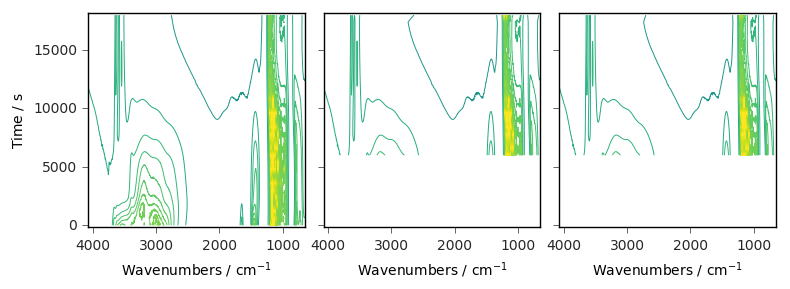

In [12]:
_ = multiplot_map(datasets=[nd2a, nd4a, ndadd],  colormap='viridis', sharey=True,
                nrow=1, ncol=3, figsize=(8, 3), dpi=100)

### `last` method

In [13]:
# `last` method => align on the last dataset
nd2a, nd4a = align(nd2, nd4, dim='y', method='last')
ndadd = nd2a + nd4a
ndadd.shape   # note the difference with the outer method above

(45, 3549)

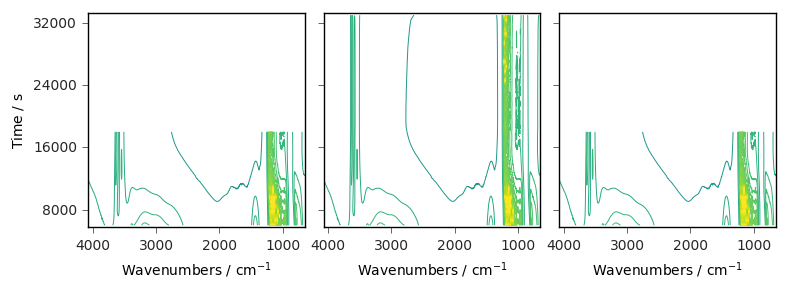

In [14]:
_ = multiplot_map(datasets=[nd2a, nd4a, ndadd],  colormap='viridis', sharey=True,
                nrow=1, ncol=3, figsize=(8, 3), dpi=100)

## Alignment along several dimensions 

In [20]:
nd1a, nd2a, nd3a, nd4a = align(nd1, nd2, nd3, nd4, dims=['x','y'])   # by default the outer method is used
nd1a.shape

(55, 5549)

In [21]:
ndadd = nd1a + nd2a + nd3a + nd4a

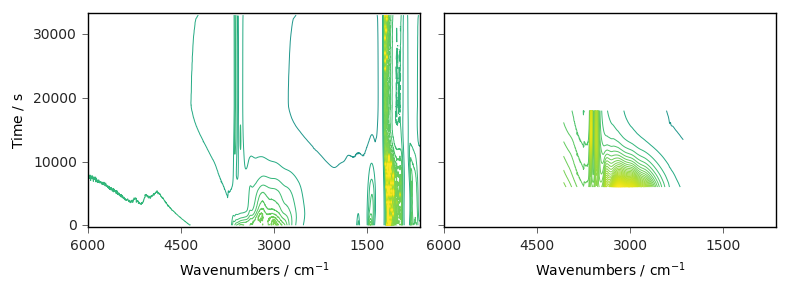

In [22]:
# Comparison of the result array with the original (only the common region is visible, due to the masks)
_ = multiplot_map(datasets=[dataset, ndadd],  colormap='viridis', sharex=0, sharey=True,
                nrow=1, ncol=2, figsize=(8, 3), dpi=100)